# Simple Linear Regression
 
 
 ## Car Weight & Mileage



Although it is relatively simple compared to many modern data analysis techniques, linear regression is an incredibly useful tool. Let's walk through a simple example together, using data to model the mileage of a car based on its weight.


### Setup

We'll start by importing some of the basic libraries used for data analysis.

In [1]:
#import basic libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Explore/Visualize the Data

Next we'll load the data.

You can find the data [here](https://raw.githubusercontent.com/mjoehler94/Side-Projects/master/SLR_mpg/MPGData.txt). 

In [19]:
#load data and look at first few values.
car_data = pd.read_csv('MPGData.txt',delimiter=' ')
print('Dimensions: ',car_data.shape)
car_data.head(10)

Dimensions:  (289, 2)


,Weight,MPG
0,3436,18.0
1,3433,16.0
2,3449,17.0
3,3086,14.0
4,2372,24.0
5,2833,22.0
6,2774,18.0
7,2587,21.0
8,2130,27.0
9,1835,26.0


Looks like we read in the data successfully!

Let's explore the data a little bit with a simple scatter plot. If the data appear to have a linear relationship, then we should be able to proceed using simple linear regression.

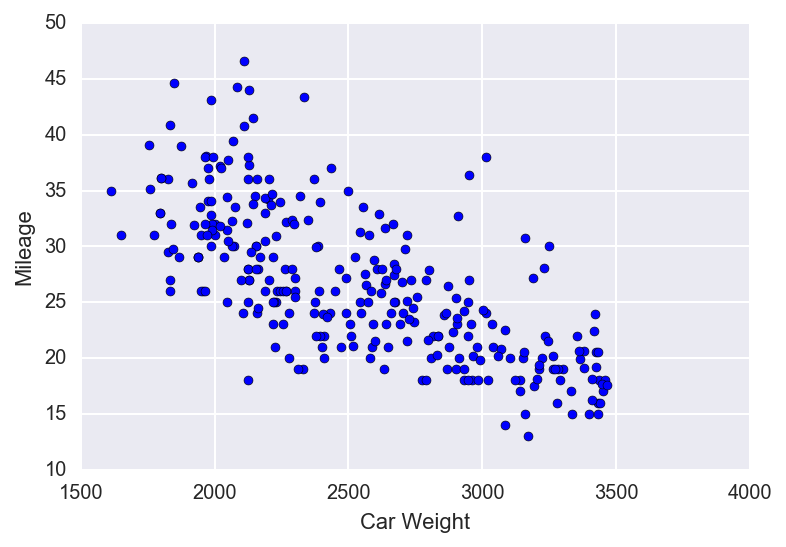

In [3]:
#visualize data
X =  car_data.drop('MPG',axis = 1) #we'll use the weight of the cars as our X variable
Y =  car_data.MPG #we'll use the mileage of the car as our Y variable
plt.scatter(X,Y)
plt.xlabel('Car Weight')
plt.ylabel('Mileage')
plt.show()


Looking at this plot, I think it's pretty safe to say that the weight and mileage of a car are indeed linearly related. So we'll go ahead and proceed with our regression analysis.

### Assumptions

When doing simple linear regression, there are four basic assumptions or rules that we need to follow. We can easily remember them by using the acronym "LINE". 

__L - Linear:__ The data need to be linearly related.
- It wouldn't make sense for us to try and model data with a straight line if the data aren't linearly related.
- We can verify that the data are linearly related with a scatterplot (as shown above).
- We could also assess the strength of that linearity by calculating the correlation coefficient.

__I - Independent:__ The error terms $ \varepsilon_1, \varepsilon_2, \ldots, \varepsilon_n$ are independant random variables.
- For two variables to be independent means that having information about one variable doesn't give you any information about the other.
- I don't know of a good visual aid to test for independence. But, for the most part, we can safely make this assumption by taking a step back and critically thinking about the data.
- For more information check out the independence page on [wikipedia](https://en.wikipedia.org/wiki/Independence_(probability_theory).


__N - Normal:__ The error terms follow a normal distribution.
- We can check this assumption using a histogram, a [Q-Q Plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot), or a [KS test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test).

__E - Equal Variance__: the variance of the error terms must be constant throughout the entire data set.
- The big fancy word for this is "homoscedastic."
- We can check this assumption using a residual plot.

With that, let's fit a model to the data set and see if we meet our assumptions. We will use sklearn to fit our model. 

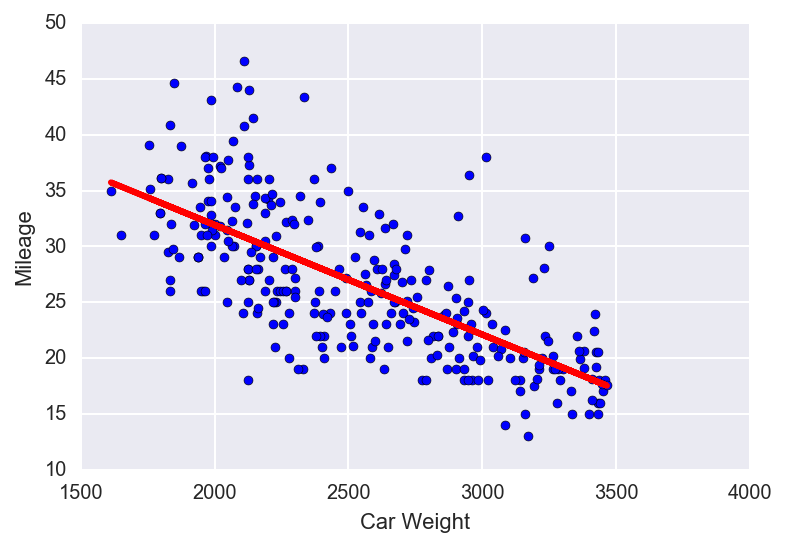

Model Summary: 
 Intercept: 51.587169
 Coefficient: -0.009833


In [4]:
#using sklearn
from sklearn import linear_model as lm

#create a linear regression object (regr is short for regressor)
regr = lm.LinearRegression()

#fit the model to the data
regr.fit(X,Y)

#plot of the model 
#plot of the model fitted to the data
plt.scatter(X,Y)
plt.xlabel('Car Weight')
plt.ylabel('Mileage')
plt.plot(X, regr.predict(X),color = 'red',linewidth = 3)
plt.show()

#model summary
print('Model Summary: ')
print(' Intercept: %f\n'% regr.intercept_,'Coefficient: %f' % regr.coef_[0])

Our regression model is set up as follows: 

 $ Y_i = \beta_0 + \beta_1  X_i + \varepsilon_i $


- $Y_i$ is the mileage of the $i^{th}$ car.

- $X_i$ is the weight of the $i^{th}$ car.

- The intercept, $\beta_0$, is the expected mileage of a car that weighs 0 lbs. In this situation, the interpretation isn't particularly useful, but it's still important to understand what it means. 

- The coefficient, $\beta_1$, tells us the average change in mileage for every increase of 1 lb in car weight. 

- Lastly, $\varepsilon_i$ is the error term that represents the 'noise' in the data for the $i^{th}$ car.


### Check Assumptions

Now let's check to see if we meet all of the necessary assumptions.

We already verified that our data has a **LINEAR** relationship using a scatter plot. 
It is also safe to assume that our **INDEPENDENCE** assumption is met since it is unlikely that the mileage of one car has any effect on the mileage of another car. Again, there isn't really a good visual aid to show this, we just have to think about it and make sure that we are justified in making this assumption. Next we can check the **NORMALITY** and **EQUAL VARIANCE** assumptions using the plots below.

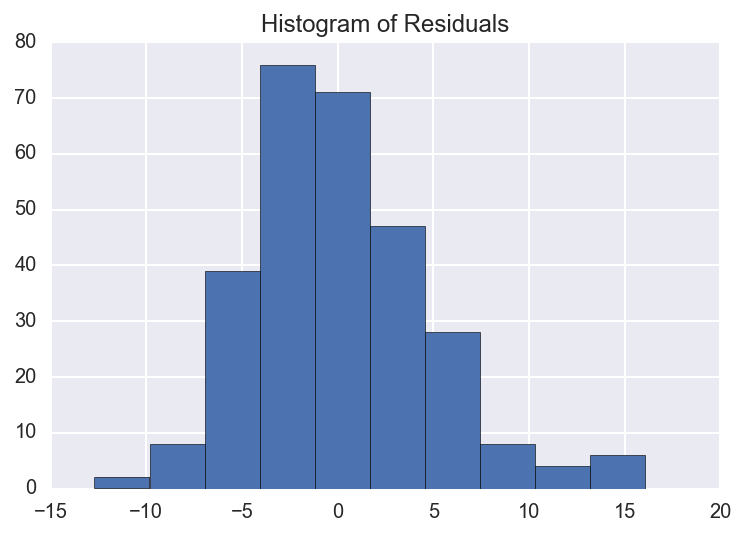

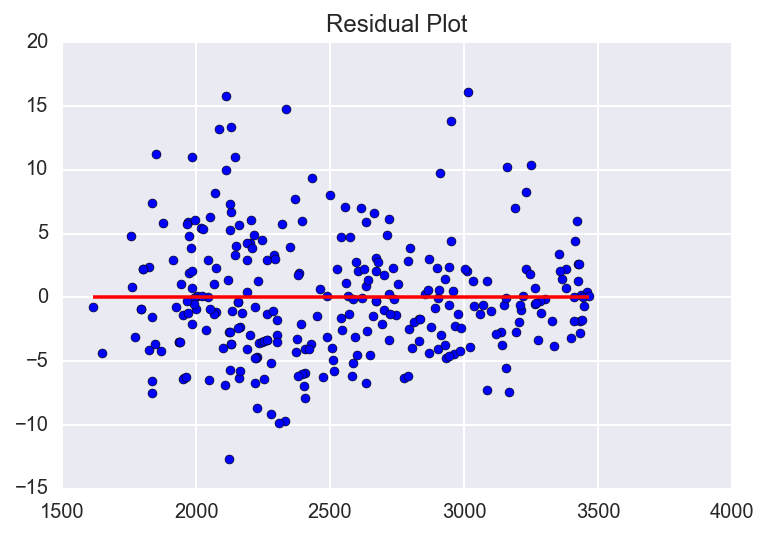

In [5]:
#calculate residuals
residuals = Y - regr.predict(X)

#histogram of residuals - for normality assumption
plt.hist(residuals)
plt.title('Histogram of Residuals')
plt.show()

#residual plot - for equal variance assumption
plt.scatter(X,residuals)
plt.hlines(y=0,xmin = X.min()[0],xmax=X.max()[0],color = 'red')
plt.title("Residual Plot")
plt.show()

From the histogram of residuals we can see that they (roughly) follow a normal distribution, therefore the **NORMALITY** assumption is met. 

In our residuals plot, we are checking to see that the dots are spread approximately even on either side of the line for the entire range of the data. Although it doesn't appear to be a perfectly even spread, I would still feel justified saying that the **EQUAL VARIANCE** assumption is met. Truth be told, with real world data it is very rare to meet all of the assumptions perfectly, but as long as we meet them within reason we can proceed without any major issues.

Awesome! All of our assumptions have been met. 

### Assess Fit of the Model
Now let's see how well our model fits the data. We can do this by calculating the coefficient of determination. Sklearn makes this really easy.

In [6]:
#coefficienct of determination
print('Coefficient of Determination: ',regr.score(X,Y))

Coefficient of Determination:  0.504834173768


The coefficient of determination, also referred to as $R^{2}$, tells us that 50.48% of the variablility in a car's mileage is explained by its weight. Ideally we would use more covariates in our model such as the age of the car or whether it has a hybrid engine to increase this number. However, given that we only have one variable in our model, 50% isn't all that bad.

Next let's calculate the mean squared error (MSE) for the model.

In [7]:
#mean squared error
mse = np.mean((Y - regr.predict(X))**2)
print('Mean Squared Error: ',mse)

Mean Squared Error:  22.150906045184783


By itself, the mean squared error doesn't have a great interpretation.It varies with each situation based on the units of the data. However, it is useful when comparing models for the same problem. The model with the lower MSE fits the data better.

So now what...? Why did we even make this model in the first place?

It is important to note that people don't model data just for the sake of modeling data. In our case, since we modeled car mileage as a function of weight, we can use the model coefficient to assess how much of an effect a car's weight has on its mileage. (When using multiple covariates we can also assess which variables have the greatest or least effects.) Additionally, we can predict the mileage of a car, given its weight. We'll run through this now.

### Predict
Let's pretend that a car company has completed designs for a new sedan. The blueprints indicate that it will weigh about 2,300 lbs. Using our model and sklearns built in prediction function we can predict the new sedan's mileage.

 Our model for predicting is as follows, with $\hat{y}$ representing the predicted mileage: 
 
 
 $ \hat{y} = \beta_0 + \beta_1  (CarWeight) $
 

In [8]:
#predict the mileage of a car I want to buy
cw= 2300 #car weight
print('Car Weight: ',cw)
print('Predicted Mileage: ', regr.predict(2000)[0])

Car Weight:  2300
Predicted Mileage:  31.9204035524


### Summary
There you have it. A walk-through of a simple linear regression analysis. Here's a summary of what we did. 
1. We explored the car data and determined that it was linearly related
2. We verified that the data met all of the necessary assumptions for simple linear regression.
3. We determined how well our model fit the data using $R^{2}$ and MSE. 
4. We used our model to predict the gas mileage of a new car. 